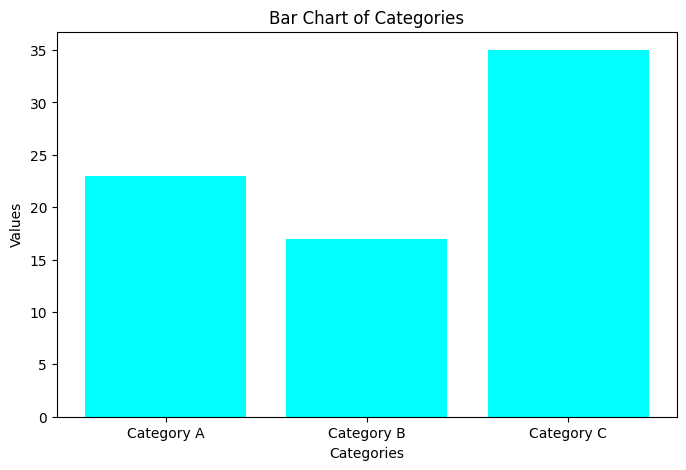

In [1]:
# EXERCISE 1 : Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


In [3]:
!pip install seaborn

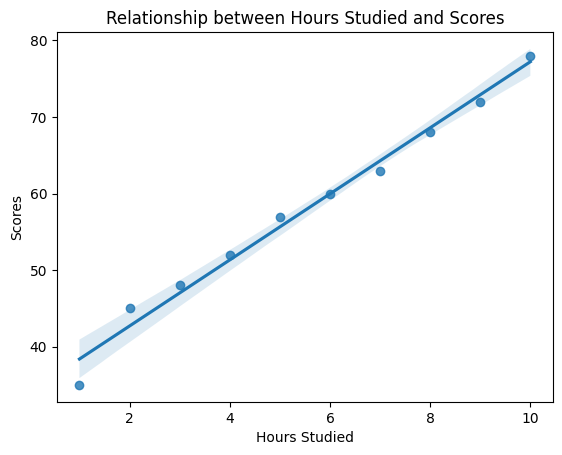

In [4]:
# EXERCISE 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


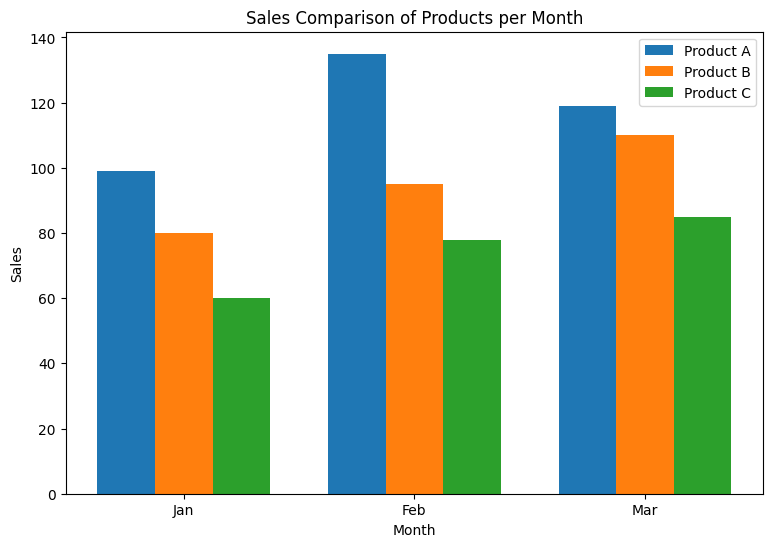

In [3]:
# PRACTICE TASK
import pandas as pd

data = {
    'Product': ['A','A','A','B','B','B','C','C','C'],
    'Month': ['Jan','Feb','Mar','Jan','Feb','Mar','Jan','Feb','Mar'],
    'Sales': [99, 135, 119, 80, 95, 110, 60, 78, 85],
    'Revenue': [2400, 2700, 3000, 1600, 1900, 2200, 1200, 1400, 1700]
}

df = pd.DataFrame(data)
df

# PRACTICE TASK 1 : Multi-Bar Chart
import matplotlib.pyplot as plt
import numpy as np

products = df['Product'].unique()
months = ['Jan','Feb','Mar']

plt.figure(figsize=(9,6))

x = np.arange(len(months))
width = 0.25

plt.bar(x - width, df[df['Product']=='A']['Sales'], width, label='Product A')
plt.bar(x, df[df['Product']=='B']['Sales'], width, label='Product B')
plt.bar(x + width, df[df['Product']=='C']['Sales'], width, label='Product C')

plt.xticks(x, months)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Comparison of Products per Month")
plt.legend()
plt.show()


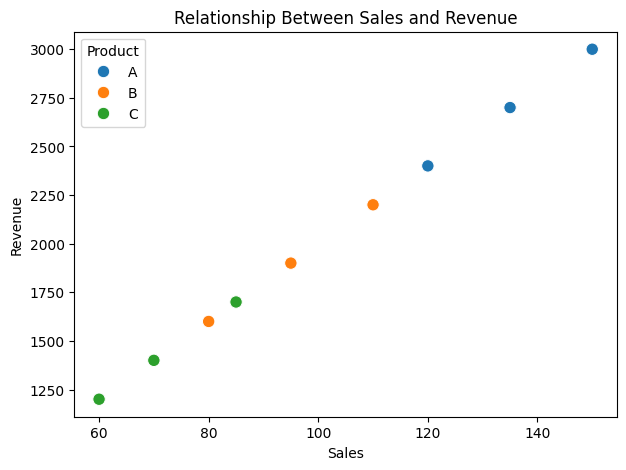

In [2]:
# PRACTICE TASK 2 : Scatter Plot with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Sales', y='Revenue', hue='Product', s=80)

plt.title("Relationship Between Sales and Revenue")
plt.show()


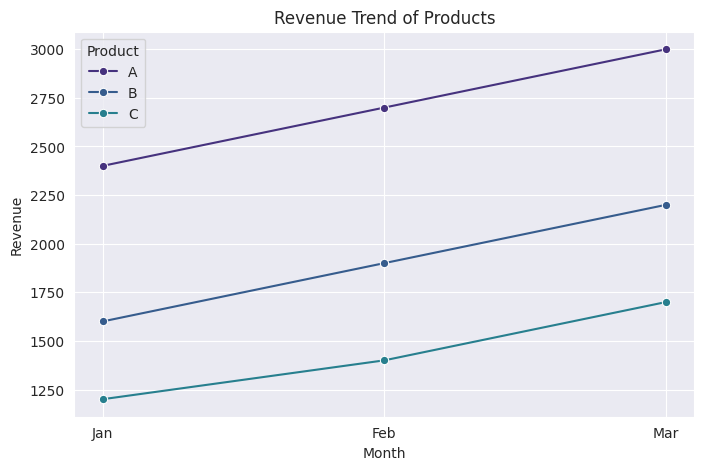

In [4]:
# PRACTICE TASK 3 : Customized Layout
sns.set_style("darkgrid")
sns.set_palette("viridis")

plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Month', y='Revenue', hue='Product', marker="o")

plt.title("Revenue Trend of Products")
plt.show()


In [8]:
# HOMEWORK
# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
df = pd.read_csv("/home/zara/Downloads/archive/Titanic-Dataset.csv")

# Lihat 5 data awal
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 3. Cek missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Cleaning Dataset
# Drop Cabin karena missing terlalu banyak
df = df.drop(columns=["Cabin"])

# Imputasi Age pakai median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Imputasi Embarked pakai modus
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


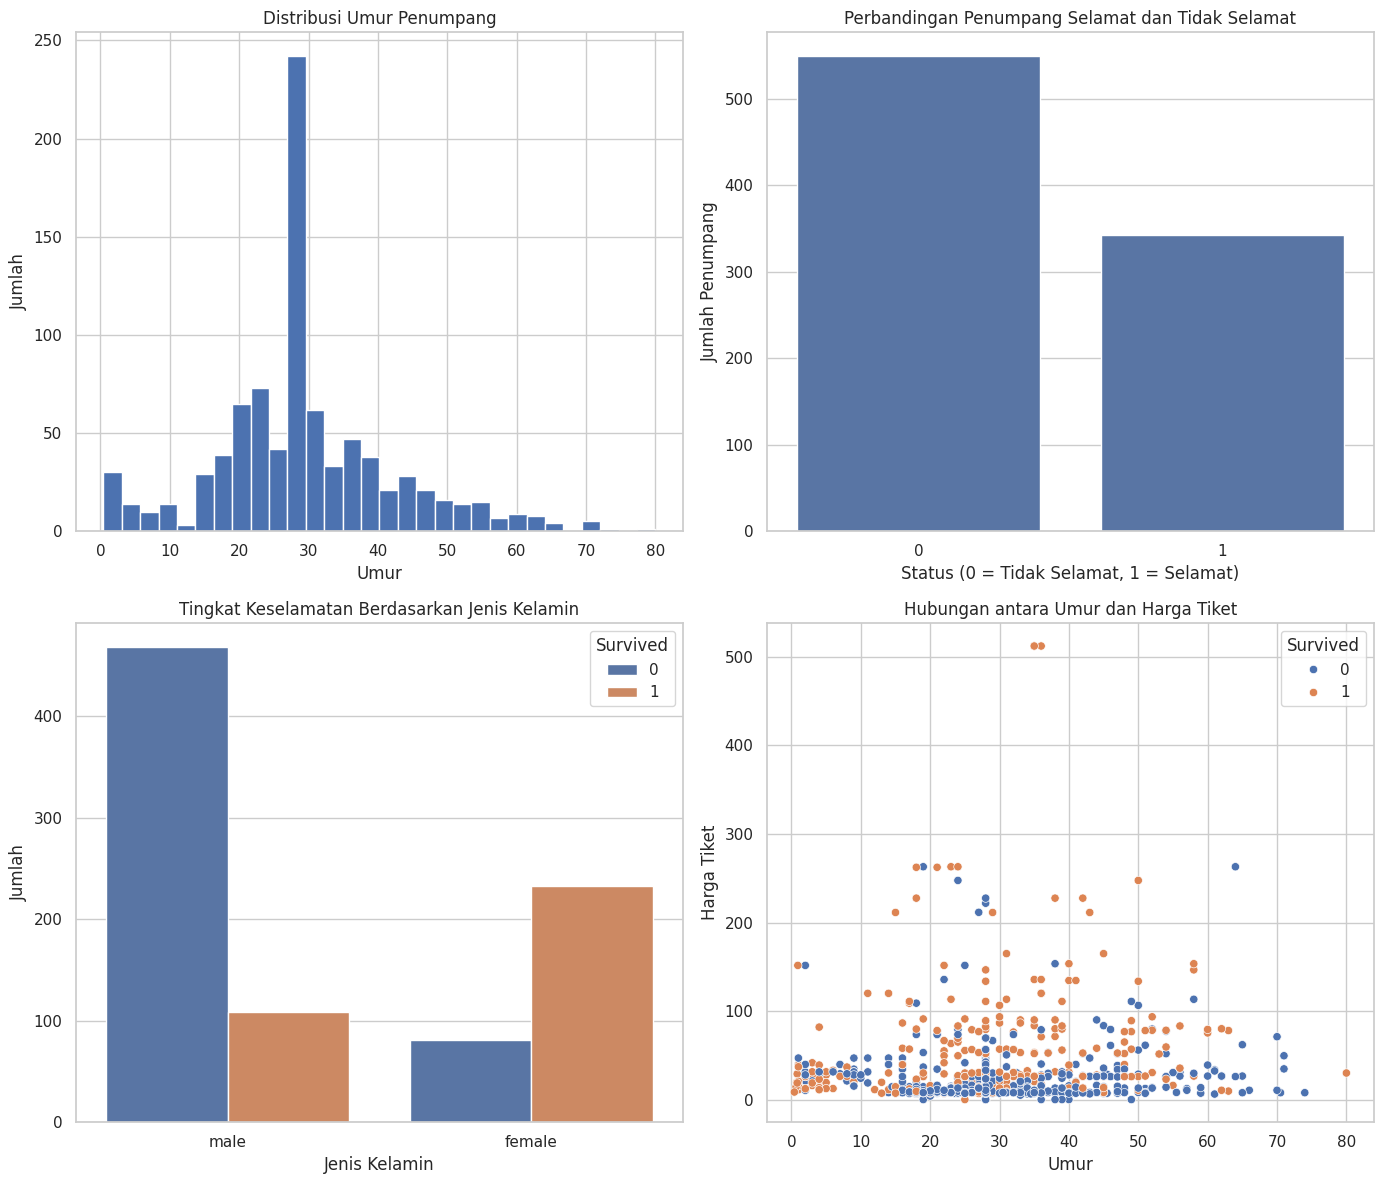

In [12]:
# Dashboard Visualization
plt.figure(figsize=(14,12))

# 1. Histrogram Age
plt.subplot(2, 2, 1)
plt.hist(df["Age"], bins=30)
plt.title("Distribusi Umur Penumpang")
plt.xlabel("Umur")
plt.ylabel("Jumlah")

# 2. Countplot Survived
plt.subplot(2, 2, 2)
sns.countplot(x="Survived", data=df)
plt.title("Perbandingan Penumpang Selamat dan Tidak Selamat")
plt.xlabel("Status (0 = Tidak Selamat, 1 = Selamat)")
plt.ylabel("Jumlah Penumpang")

# 3. Survival by Sex
plt.subplot(2, 2, 3)
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Tingkat Keselamatan Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")

# 4. Scatter Fare vs Age
plt.subplot(2, 2, 4)
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Hubungan antara Umur dan Harga Tiket")
plt.xlabel("Umur")
plt.ylabel("Harga Tiket")

plt.tight_layout()
plt.show()